In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from tqdm.notebook import tqdm
import dill

In [2]:
warnings.simplefilter('ignore')

# Разведочный анализ данных

## Первичный отбор признаков

In [7]:
pd.set_option('display.max_columns', None)

data = pd.read_csv(f'data/main_data.zip', sep=';')
print(f'Датасет содержит {data.shape[0]} записей и {data.shape[1]} признака')
print('Выборка из 5 случайных строк датасета:')

Датасет содержит 96795 записей и 63 признака
Выборка из 5 случайных строк датасета:


In [8]:
data.sample(5)

,Название курса,Идентификатор курса,Дата последнего обновления структуры курса,Группа курса,Менеджеры курса,Номер темы,ID обучающегося в курсе,Идентификатор обучающегося,ФИО,В какой сущности потерялся,Дата завершения курса,Прогресс по курсу,Дата получения прогресса >= 80% по курсу,Результат по курсу,Дата начала изучения курса,Статус по курсу,"Средняя оценка, выставленная за курс",Последняя выставленная оценка курсу,Дата последней выставленной оценки,Комментарий,Дата комментария,Количество входов в курс,Количество неактивных дней в курсе,Последний вход в курс,Время изучения курса,Время повторения курса,Общее время в курсе,Количество сессий всего,Количество сессий изучения курса,Количество сессий повторения курса,Среднее время сессии изучения курса,Среднее время сессии повторения курса,Идентификатор по сущности,Уровень сущности,Название сущности,Полное название сущности (с названиями всех родителей),Порядок сущности,Тип контента сущности,ID родительской сущности,Название родительской сущности,Идентификатор по родительской сущности,Количество прохождений сущности на 100% после прохождения курса,Количество перепрохождений сущности на 100%,Дата последнего passed в сущности,Прогресс по сущности,Дата завершения сущности,Отказы по сущности,Результат по сущности,Дата начала изучения сущности,Статус по сущности,Время в сущности до прохождения сущности,Время в сущности до прохождения курса,Время в сущности после прохождения сущности,Время в сущности после прохождения курса,Общее время нахождения в сущности,Попытки повторения по сущности,Попытки изучения по сущности,Все попытки по сущности,Дата назначения курса,Плановый срок изучения курса,Джоб-код назначения,Статус назначения,Дата составления отчета
83331,id 242 На пике: как работать в напряженных усл...,https://urbanlearning.mguu.ru/xapi/course/242,2022-05-30 18:03:32,NaN,NaN,NaN,4130837,44245@https://urbanlearning.mguu.ru/users,Н/Д,Тотальное восстановление / Тотальное восстанов...,2022-07-17 17:07:44,"100,00%",2022-07-17 17:08:03,"2,98%",2022-05-31 08:04:32,Изучил,"0,00","0,00",NaN,NaN,NaN,0,3,2022-07-17 17:22:54,10:10:52,00:00:18,10:11:10,39,39,1,00:15:30,00:03:57,https://urbanlearning.mguu.ru/xapi/activities/...,1.0,Дорожный дневник,Многозадачность в режиме ограниченного времени...,3.0,Проверка заданий,20649.0,Многозадачность в режиме ограниченного времени,https://urbanlearning.mguu.ru/xapi/blocks/1101,0.0,0.0,2022-07-10 08:29:39,"100,00%",2022-07-10 08:29:39,0.0,"100,00%",2022-07-04 05:59:44,Изучил,00:03:38,00:03:38,00:00:00,00:00:00,00:03:38,0.0,2.0,2.0,2022-05-31 09:36:51,NaN,NaN,NaN,20.07.2022
11003,id 241 На пике: как работать в напряженных усл...,https://urbanlearning.mguu.ru/xapi/course/241,2022-05-13 13:22:31,NaN,NaN,NaN,3979288,25103@https://urbanlearning.mguu.ru/users,Н/Д,NaN,NaN,"94,44%",2022-06-29 19:28:38,"88,94%",2022-05-13 09:33:42,Изучает,"0,00","0,00",NaN,NaN,NaN,0,21,2022-06-29 19:28:40,00:14:11,00:00:00,00:14:11,3,3,0,00:06:46,00:00:00,https://urbanlearning.mguu.ru/xapi/rabota_v_na...,2.0,Для чего покорять вершины?,Природа стресса > Для чего покорять вершины? >...,0.0,Лонгрид,20038.0,Для чего покорять вершины?,https://urbanlearning.mguu.ru/xapi/rabota_v_na...,0.0,0.0,2022-05-13 09:33:42,"100,00%",2022-05-13 09:33:42,0.0,"100,00%",2022-05-13 09:33:42,Зачтено,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,0.0,0.0,0.0,2022-05-13 12:32:55,NaN,NaN,NaN,20.07.2022
36284,id 241 На пике: как работать в напряженных усл...,https://urbanlearning.mguu.ru/xapi/course/241,2022-05-13 13:22:31,NaN,NaN,NaN,3979571,36936@https://urbanlearning.mguu.ru/users,Н/Д,NaN,NaN,"16,67%",2022-05-17 19:18:44,"0,17%",2022-05-17 14:17:47,Изучает,"0,00","0,00",NaN,NaN,NaN,0,64,2022-05-17 19:18:47,00:03:40,00:00:00,00:03:40,2,2,0,00:02:07,00:00:00,https://urbanlearning.mguu.ru/xapi/rabota_v_na...,2.0,Диагностика текущего нервно-психического напря...,Природа стресса > Природа стресса > Диагностик...,1.0,Опросник,20046.0,Природа стресса,https://urbanlearning.mguu.ru/xapi/rabota_v_na...,0.0,0.0,NaN,0%,Na

In [5]:
# Найдем неинформативные признаки
values = []
for col in data.columns:
    missing_values = data[col].isna().sum()/len(data)*100
    unique_values = len(data[col].unique())
    values.append([col, missing_values, unique_values])
pivot_data = pd.DataFrame(values, columns=['Признак', 'Процент пропущенных значений', 'Число уникальных категорий'])
cols_for_drop = pivot_data[(pivot_data['Процент пропущенных значений']==100) | (pivot_data['Число уникальных категорий']==1) | (pivot_data['Число уникальных категорий']==len(data))]
print('Неинформативные признаки:')
cols_for_drop

Неинформативные признаки:


,Признак,Процент пропущенных значений,Число уникальных категорий
3,Группа курса,100.0,1
4,Менеджеры курса,100.0,1
5,Номер темы,100.0,1
8,ФИО,0.0,1
16,"Средняя оценка, выставленная за курс",0.0,1
17,Последняя выставленная оценка курсу,0.0,1
18,Дата последней выставленной оценки,100.0,1
19,Комментарий,100.0,1
20,Дата комментария,100.0,1
21,Количество входов в курс,0.0,1


In [6]:
# Удаление неинформативных признаков
data.drop(columns=cols_for_drop['Признак'], inplace=True)

## Преобразование типов данных

In [7]:
# Преобразуем процентные признаки числовому типу данных
def percent_to_number(percent):
    if type(percent) == float:
        return percent
    else:
        return float(percent.strip('%').replace(',', '.'))

percent_cols = ['Прогресс по курсу', 'Результат по курсу', 'Результат по сущности', 'Прогресс по сущности']

for col in percent_cols:
    data[col] = data[col].apply(percent_to_number)

In [8]:
# Преобразуем временные признаки в количество часов

def to_hours(string_value):
    if type(string_value) == float:
        return string_value
    else:
        h, m, s = (int(s) for s in string_value.split(':'))
        return h+m/60+s/3600

time_cols = [
    'Время изучения курса',
    'Время повторения курса',
    'Общее время в курсе',
    'Среднее время сессии изучения курса',
    'Среднее время сессии повторения курса',
    'Время в сущности до прохождения сущности',
    'Время в сущности до прохождения курса',
    'Время в сущности после прохождения сущности',
    'Время в сущности после прохождения курса',
    'Общее время нахождения в сущности'
]

for col in time_cols:
    data[col] = data[col].apply(to_hours)

In [9]:
cat_cols = [
    'Название курса',
    'Идентификатор курса',
    'ID обучающегося в курсе',
    'Идентификатор обучающегося',
    'В какой сущности потерялся',
    'Статус по курсу',
    'Идентификатор по сущности',
    'Название сущности',
    'Полное название сущности (с названиями всех родителей)',
    'Тип контента сущности',
    'ID родительской сущности',
    'Название родительской сущности',
    'Идентификатор по родительской сущности',
    'Статус по сущности'
]

date_cols = [
    'Дата последнего обновления структуры курса',
    'Дата завершения курса',
    'Дата получения прогресса >= 80% по курсу',
    'Дата начала изучения курса',
    'Последний вход в курс',
    'Дата последнего passed в сущности',
    'Дата завершения сущности',
    'Дата начала изучения сущности',
    'Дата назначения курса'
]

num_cols = data.drop(columns=cat_cols+date_cols).columns
data[cat_cols] = data[cat_cols].astype(object)
for col in date_cols:
    data[col] = pd.to_datetime(data[col])

## Статистические характеристики признаков

### Числовые признаки

In [10]:
num_describe = data[num_cols].describe().T
num_describe['count'] = 100-num_describe['count']/len(data)*100
num_describe.rename({'count': 'miss %'}, inplace=True, axis=1)
num_describe

,miss %,mean,std,min,25%,50%,75%,max
Прогресс по курсу,0.000000,56.178018,43.510451,0.0,8.330000,58.330000,100.000000,100.000000
Результат по курсу,0.000000,2.868861,9.483849,0.0,0.080000,2.310000,3.000000,100.000000
Количество неактивных дней в курсе,0.000000,19.785196,17.044912,0.0,4.000000,19.000000,27.000000,68.000000
Время изучения курса,0.000000,15.433404,42.593111,0.0,0.002222,3.436667,8.495556,356.745278
Время повторения курса,0.000000,8.022701,55.582596,0.0,0.000000,0.000000,0.003611,893.541389
Общее время в курсе,0.000000,23.456104,73.982659,0.0,0.003611,3.562778,9.174167,900.362500
Количество сессий всего,0.000000,20.956868,21.945666,0.0,1.000000,14.000000,36.000000,120.000000
Количество сессий изучения курса,0.000000,19.641758,20.601931,0.0,1.000000,13.000000,34.000000,108.000000
Количество сессий повторения курса,0.000000,1.666450,3.232380,0.0,0.000000,0.000000,2.000000,44.000000
Среднее время сессии изучения курса,0.000000,0.180898,0.158518,0.0,0.006389,0.178333,0.265556,1.359722


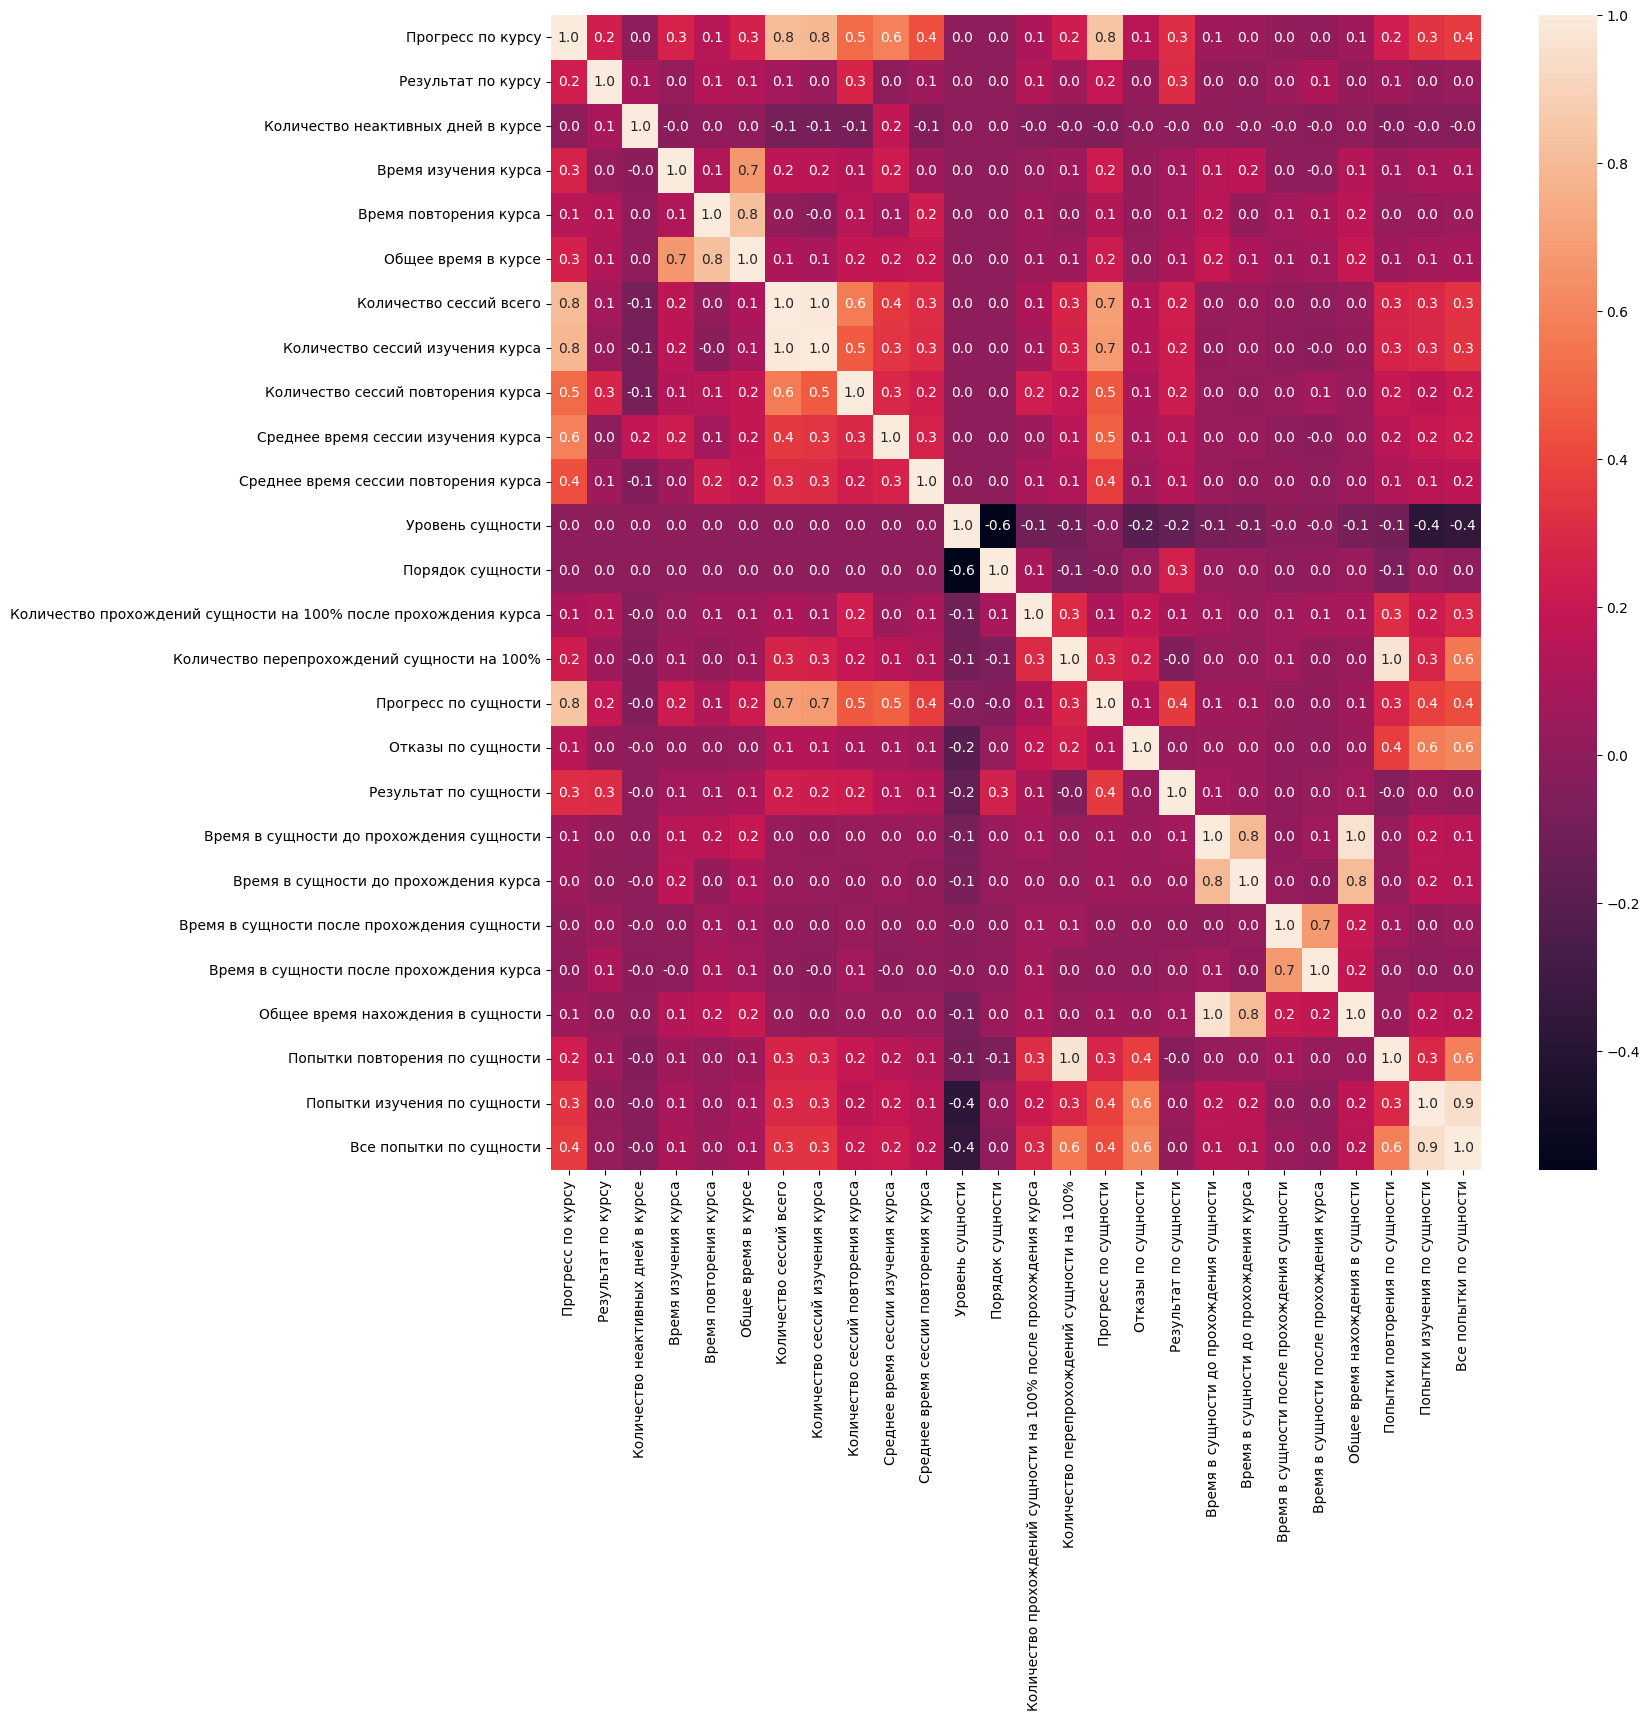

In [12]:
plt.figure(figsize=(15, 15))
sns.heatmap(data[num_cols].corr(), annot=True, fmt='.1f');

1. Вероятно, пропуски в числовых признаках находятся в одних и тех же строках (**Предположение 1**).
2. Следующие пары признаков обладают крайне высокой линейной корреляцией:
    * "Количество сессий всего" и "Количество сессий изучения курса"
    * "Попытки повторения по сущности" и "Количество прохождений сущности"
    * "Время в сущности до прохождения сущности" и "Общее время нахождения в сущности"
    * "Попытки изучения по сущности" и "Все попытки по сущности"



### Категориальные признаки

In [13]:
cat_describe = data[cat_cols].describe().T
cat_describe['count'] = 100-cat_describe['count']/len(data)*100
cat_describe.rename({'count': 'miss %'}, inplace=True, axis=1)
cat_describe

,miss %,unique,top,freq
Название курса,0.0,5,id 241 На пике: как работать в напряженных усл...,65208
Идентификатор курса,0.0,5,https://urbanlearning.mguu.ru/xapi/course/241,65208
ID обучающегося в курсе,0.0,1108,3979615,104
Идентификатор обучающегося,0.0,1086,45771@https://urbanlearning.mguu.ru/users,211
В какой сущности потерялся,73.568883,57,Вводный инструктаж / Вводный инструктаж / Введ...,2912
Статус по курсу,0.0,4,Изучил,42432
Идентификатор по сущности,0.184927,127,https://urbanlearning.mguu.ru/xapi/rabota_v_na...,929
Название сущности,0.184927,49,Дорожный дневник,14864
Полное название сущности (с названиями всех родителей),0.184927,94,Природа стресса > Дорожный дневник,2787
Тип контента сущности,0.184927,10,Подглава,30657


In [14]:
print(f'Категории в признаке "Статус по курсу": {data["Статус по курсу"].unique()}')
print(f'Категории в признаке "Статус по сущности": {data["Статус по сущности"].unique()}')

Категории в признаке "Статус по курсу": ['Изучает' 'Не изучал' 'Изучил' 'Зачтено']
Категории в признаке "Статус по сущности": [nan 'Изучил' 'Изучает' 'Не приступал' 'Зачтено']


1. В признаке "В какой сущности потерялся" много пропущенных значений (~73 %).
2. В следующих признаках пропуски находятся в одних и тех же строках, что и пропуски в числовых признаках (**Предположение 1**):
    * "Идентификатор по сущности"
    * "Название сущности"
    * "Полное название сущности (с названиями всех родителей)"
    * "Тип контента сущности"
    * "Статус по сущности"
3. В следующих признаках пропуски находятся в одних и тех же строках, там, где у сущности нет родителя (**Предположение 2**):
    * ID родительской сущности
    * Название родительской сущности
    * Идентификатор по родительской сущности

   Таким пропускам можно будет присвоить отдельную категорию

### Признаки дат

In [15]:
date_describe = data[date_cols].describe().T
date_describe['count'] = 100-date_describe['count']/len(data)*100
date_describe.rename({'count': 'miss %'}, inplace=True, axis=1)
date_describe

,miss %,mean,min,25%,50%,75%,max
Дата последнего обновления структуры курса,0.184927,2022-05-19 03:31:50.765339136,2022-05-13 13:22:31,2022-05-13 13:22:31.000000000,2022-05-13 13:22:31.000,2022-05-30 18:03:32.000000000,2022-05-30 18:03:32
Дата завершения курса,55.733251,2022-06-28 16:38:21.366504704,2022-05-13 09:33:21,2022-06-22 18:02:24.249999872,2022-06-27 02:47:17.000,2022-07-05 09:44:09.249999872,2022-07-18 14:08:51
Дата получения прогресса >= 80% по курсу,23.285294,2022-06-24 00:00:53.504201728,2022-05-13 09:33:18,2022-06-19 06:13:11.000000000,2022-06-28 07:38:20.500,2022-07-01 21:36:04.000000000,2022-07-19 15:15:53
Дата начала изучения курса,21.080634,2022-05-24 15:23:36.907893504,2022-05-12 13:05:21,2022-05-17 12:26:45.000000000,2022-05-19 19:01:28.000,2022-05-31 08:40:48.000000000,2022-07-07 12:53:16
Последний вход в курс,21.080634,2022-06-25 10:33:09.482733312,2022-05-13 09:33:18,2022-06-20 14:38:15.000000000,2022-06-28 15:45:41.000,2022-07-05 05:05:10.000000000,2022-07-20 08:27:04
Дата последнего passed в сущности,49.617232,2022-06-13 12:51:54.426057984,2022-05-13 09:33:18,2022-06-01 06:57:00.000000000,2022-06-14 13:59:19.000,2022-06-24 06:40:31.000000000,2022-07-19 15:12:30
Дата завершения сущности,49.914768,2022-06-13 09:13:40.602207232,2022-05-13 09:33:18,2022-06-01 05:37:33.000000000,2022-06-14 13:20:40.000,2022-06-23 19:21:03.000000000,2022-07-19 15:12:30
Дата начала изучения сущности,48.342373,2022-06-12 15:11:10.097956096,2022-05-13 09:33:18,2022-05-31 10:20:42.000000000,2022-06-14 08:34:37.000,2022-06-23 08:11:40.500000000,2022-07-20 08:15:31
Дата назначения курса,49.961258,2022-05-19 11:00:30.587777280,2022-05-12 15:38:22,2022-05-13 12:32:50.000000000,2022-05-13 12:33:05.000,2022-05-31 09:36:41.000000000,2022-07-07 15:53:09


1. Пропуски в признаках "Дата завершения курса" и "Дата завершения сущности" соответсвуют объектам, у которых не завершен курс и сущность соответственно. (**Предположение 3**)
2. Пропуски в признаках "Дата начала изучения курса" и "Дата начала изучения сущности" соответсвуют объектам, у которых курс и сущность имеют статус "Не изучал" и "Не приступал" соответсвенно (**Предположение 4**)
3. Пропуски в признаке "Последний вход в курс" соответсвуют объектам, у которых курс имеет статус "Не присутпал". (**Предположение 5**)


# Подготовка данных

## Обработка пропусков и проверка предположений

In [16]:
# Удаление признака "В какой сущности потерялся" с большим числом пропусков
data.drop(columns=['В какой сущности потерялся'], inplace=True)

Проверим предположие 1

In [17]:
verify_cols = [
    'Общее время нахождения в сущности',
    'Количество прохождений сущности на 100% после прохождения курса',
    'Количество перепрохождений сущности на 100%',
    'Все попытки по сущности',
    'Прогресс по сущности',
    'Попытки изучения по сущности',
    'Время в сущности после прохождения курса',
    'Результат по сущности',
    'Попытки повторения по сущности',
    'Статус по сущности',
    'Время в сущности до прохождения сущности',
    'Тип контента сущности',
    'Время в сущности до прохождения курса',
    'Время в сущности после прохождения сущности',
    'Отказы по сущности',
    'Название сущности',
    'Порядок сущности',
    'Дата последнего обновления структуры курса',
    'Уровень сущности',
    'Идентификатор по сущности',
    'Полное название сущности (с названиями всех родителей)'
]

indexes = data[verify_cols[0]].isna()
ans_list = []
for col in verify_cols[1:]:
    ans = (indexes == data[col].isna()).sum()/len(indexes)
    ans_list.append(ans)

if sum(ans_list)/len(ans_list) == 1:
    print('Предположение 1 верно')
else:
    print('Предположение 1 неверно')

Предположение 1 верно


Посмотрим в каких курсах находятся эти пропуски

In [18]:
print("Курсы, в которых у объектов есть пропуски почти в всех числовых признаках:")
print(*data[indexes]['Название курса'].unique(), sep='\n')
print()
print("Курсы, в которых у объектов есть нет пропусков в числовых признаках:")
print(*data[~indexes]['Название курса'].unique(), sep='\n')

Курсы, в которых у объектов есть пропуски почти в всех числовых признаках:
id 244 Вызов Коперника: научиться мыслить по-новому
id 250 Вызов Коперника: научиться мыслить по-новому
id 251 Вызов Коперника: научиться мыслить по-новому

Курсы, в которых у объектов есть нет пропусков в числовых признаках:
id 241 На пике: как работать в напряженных условиях
id 242 На пике: как работать в напряженных условиях


Удалим строки с этими пропусками, таким образом, далее будем рассматривать только курсы "id 241 На пике: как работать в напряженных условиях" и "id 242 На пике: как работать в напряженных условиях"

In [19]:
 data.dropna(subset=verify_cols[0], inplace=True)

Проверим предположение 2

In [20]:
verify_cols = [
    'ID родительской сущности',
    'Название родительской сущности',
    'Идентификатор по родительской сущности'
]

indexes = data[verify_cols[0]].isna()
ans_list = []
for col in verify_cols[1:]:
    ans = (indexes == data[col].isna()).sum()/len(indexes)
    ans_list.append(ans)

if sum(ans_list)/len(ans_list) == 1:
    print('Предположение 2 верно')
    indexes = ~data['Полное название сущности (с названиями всех родителей)'].str.contains('>')
    data.loc[indexes, verify_cols] = -1 # заполнение пропусков у сущностей без родителей
else:
    print('Предположение 2 неверно')

Предположение 2 верно


In [21]:
flag_1 = data[data['Статус по курсу']!='Зачтено']['Дата завершения курса'].isna().sum() == data['Дата завершения курса'].isna().sum()
flag_2 = data[data['Статус по сущности']!='Зачтено']['Дата завершения сущности'].isna().sum() == data['Дата завершения сущности'].isna().sum()
if flag_1 and flag_2:
    print('Предположение 3 верно')
elif flag_1 or flag_2:
    print('Предположение 3 частично верно')
else:
    print('Предположение 3 неверно')

Предположение 3 верно


In [22]:
flag_1 = data[data['Статус по курсу']=='Не изучал']['Дата начала изучения курса'].isna().sum() == data['Дата начала изучения курса'].isna().sum()
flag_2 = data[data['Статус по сущности']=='Не приступал']['Дата начала изучения сущности'].isna().sum() == data['Дата начала изучения сущности'].isna().sum()
if flag_1 and flag_2:
    print('Предположение 4 верно')
elif flag_1 or flag_2:
    print('Предположение 4 частично верно')
else:
    print('Предположение 4 неверно')

Предположение 4 верно


In [23]:
flag_1 = data[data['Статус по курсу']=='Не изучал']['Последний вход в курс'].isna().sum() == data['Последний вход в курс'].isna().sum()
if flag_1:
    print('Предположение 5 верно')
else:
    print('Предположение 5 не верно')

Предположение 5 верно


## Определени порядка следования сущностей

In [24]:
print(f"Всего различных сущностей в датасете по названию {data['Полное название сущности (с названиями всех родителей)'].unique().shape[0]}")
print(f"Всего различных сущностей в датасете по идентификатору {data['Идентификатор по сущности'].unique().shape[0]}")
print(f"Всего обучающихся в датасете {data['ID обучающегося в курсе'].unique().shape[0]}")
print()

for cource_name in data['Название курса'].unique():
    sup_data = data[data['Название курса']==cource_name]
    print(f'Название курса: {cource_name}')
    print(f'Процент данных о курсе в датасете: {round(len(sup_data)/len(data)*100)}')
    print(f"Число различных сущностей по названию: {sup_data['Полное название сущности (с названиями всех родителей)'].unique().shape[0]}")
    print(f"Число различных сущностей по идентификатору: {sup_data['Идентификатор по сущности'].unique().shape[0]}")
    print(f"Число обучаюшихся: {sup_data['ID обучающегося в курсе'].unique().shape[0]}")
    print()

Всего различных сущностей в датасете по названию 94
Всего различных сущностей в датасете по идентификатору 127
Всего обучающихся в датасете 929

Название курса: id 241 На пике: как работать в напряженных условиях
Процент данных о курсе в датасете: 67
Число различных сущностей по названию: 94
Число различных сущностей по идентификатору: 104
Число обучаюшихся: 627

Название курса: id 242 На пике: как работать в напряженных условиях
Процент данных о курсе в датасете: 33
Число различных сущностей по названию: 94
Число различных сущностей по идентификатору: 104
Число обучаюшихся: 302



Курсы содержат одинаковое число сущностей, но разное число обучающихся, при этом нет обучающихся, которые есть в обеих курсах одновременно.
Также есть непустое множество сущностей, идентификаторы которых содержатся только в каком-либо одном курсе. Найдем эти сущности

In [25]:
ess_1 = data[data['Название курса']=='id 241 На пике: как работать в напряженных условиях']['Идентификатор по сущности'].unique()
ess_2 = data[data['Название курса']=='id 242 На пике: как работать в напряженных условиях']['Идентификатор по сущности'].unique()

ess_1, ess_2 = set(ess_1), set(ess_2)

ess_1_only = list(ess_1 - ess_2)
ess_2_only = list(ess_2 - ess_1)
print(f'Число сущностей, которые есть только в первом курсе: {len(ess_1_only)}')
print(f'Число сущностей, которые есть только во втором курсе: {len(ess_2_only)}')

Число сущностей, которые есть только в первом курсе: 23
Число сущностей, которые есть только во втором курсе: 23


Попробуем соотнести идентификаторы сущностей первого и второго курса между собой. Возможно, между ними можно получить однозначноее отношение. Тогда для упрощения дальнейшей агрегации идентификаторам второго курса присвоим значения идентификаторов первого курса, так же добавим признак означающий к какому курсу может принадлежать сущность.

In [26]:
data['Принадлежность сущности к курсу'] = 'Оба курса'
data.loc[data['Идентификатор по сущности'].isin(ess_1_only), 'Принадлежность сущности к курсу'] = 'Только первый курс'
data.loc[data['Идентификатор по сущности'].isin(ess_2_only), 'Принадлежность сущности к курсу'] = 'Только второй курс'

In [27]:
ess_1_data = data[data['Название курса']=='id 241 На пике: как работать в напряженных условиях']
ess_1_data = ess_1_data[['Идентификатор по сущности', 'Полное название сущности (с названиями всех родителей)', 'Порядок сущности']]
ess_1_data = ess_1_data.drop_duplicates().rename({'Идентификатор по сущности': '1'}, axis=1)

ess_2_data = data[data['Название курса']=='id 242 На пике: как работать в напряженных условиях']
ess_2_data = ess_2_data[['Идентификатор по сущности', 'Полное название сущности (с названиями всех родителей)', 'Порядок сущности']]
ess_2_data = ess_2_data.drop_duplicates().rename({'Идентификатор по сущности': '2'}, axis=1)

ess_data = pd.merge(ess_1_data, ess_2_data, on=['Полное название сущности (с названиями всех родителей)', 'Порядок сущности'])
ess_data

,1,Полное название сущности (с названиями всех родителей),Порядок сущности,2
0,https://urbanlearning.mguu.ru/xapi/blocks/1070,Вводный инструктаж,0.0,https://urbanlearning.mguu.ru/xapi/blocks/1098
1,https://urbanlearning.mguu.ru/xapi/rabota_v_na...,Вводный инструктаж > Вводный инструктаж,0.0,https://urbanlearning.mguu.ru/xapi/rabota_v_na...
2,https://urbanlearning.mguu.ru/xapi/rabota_v_na...,Вводный инструктаж > Вводный инструктаж > Введ...,0.0,https://urbanlearning.mguu.ru/xapi/rabota_v_na...
3,https://urbanlearning.mguu.ru/xapi/rabota_v_na...,Вводный инструктаж > Рабочая тетрадь,1.0,https://urbanlearning.mguu.ru/xapi/rabota_v_na...
4,https://urbanlearning.mguu.ru/xapi/rabota_v_na...,Вводный инструктаж > Рабочая тетрадь > Рабочая...,0.0,https://urbanlearning.mguu.ru/xapi/rabota_v_na...
...,...,...,...,...
99,https://urbanlearning.mguu.ru/xapi/activities/...,Тотальное восстановление > Дорожный дневник,7.0,https://urbanlearning.mguu.ru/xapi/activities/...
100,https://urbanlearning.mguu.ru/xapi/rabota_v_na...,Тотальное восстановление > Выводы и проверка з...,8.0,https://urbanlearning.mguu.ru/xapi/rabota_v_na...
101,https://urbanlearning.mguu.ru/xapi/rabota_v_na...,Тотальное восстановление > Выводы и проверка з...,0.0,https://urbanlearning.mguu.ru/xapi/rabota_v_na...
102,https://urbanlearning.mguu.ru/xapi/rabota_v_na...,Тотальное восстановление > Выводы и проверка з...,1.0,https://urbanlearning.mguu.ru/xapi/rabota_v_na...


In [28]:
# Произведем замену
relation_dict = dict(zip(ess_data['1'], ess_data['2']))
data['Идентификатор по сущности'].replace(relation_dict, inplace=True)

Необходимо пронумеровать уникальные сущности в порядке их прохождения

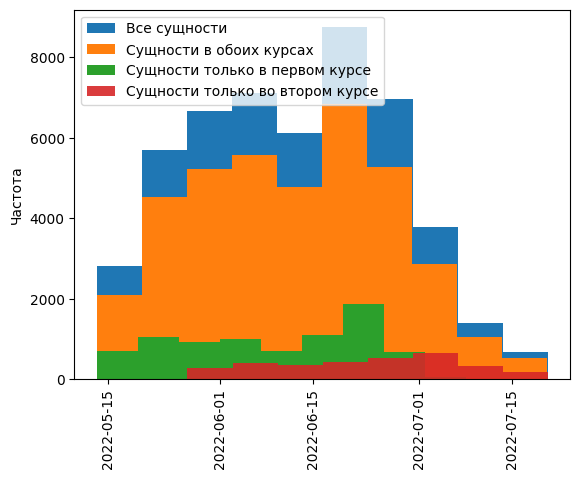

In [29]:
# Посмотрми на распределение даты начала изучения курса
an_data = data[~data['Дата начала изучения сущности'].isna()]
plt.hist(an_data['Дата начала изучения сущности'], label='Все сущности')
plt.hist(an_data[an_data['Принадлежность сущности к курсу']=='Оба курса']['Дата начала изучения сущности'], label='Сущности в обоих курсах')
plt.hist(an_data[an_data['Принадлежность сущности к курсу']=='Только первый курс']['Дата начала изучения сущности'], label='Сущности только в первом курсе')
plt.hist(an_data[an_data['Принадлежность сущности к курсу']=='Только второй курс']['Дата начала изучения сущности'], label='Сущности только во втором курсе', alpha=0.9)
plt.legend(loc=2)
plt.ylabel('Частота')
plt.xticks(rotation=90)
plt.show()

Учитывая, что есть сущности, к которым обучающиеся не приступали, будем считать, что сущности к которым приступило больше людей по хронологии идут раньше.

In [30]:
# Выделим сущности по первому курсу, чтобы избежать искажений по времени начала сущности
gp_an_data = an_data[an_data['Принадлежность сущности к курсу'].isin(['Оба курса', 'Только первый курс'])]

# Определение студентов, приступивших к сущности
gp_an_data['Приступил к сущности'] = (~gp_an_data['Дата начала изучения сущности'].isna())

# Агрегация датасета по уникальным сущностям
gp_an_data = gp_an_data.groupby('Идентификатор по сущности').agg({
    'Приступил к сущности': 'sum',
    'Дата начала изучения сущности': 'mean'})

# Сортировка датасета и определение порядка прохождения сущностей
gp_an_data.sort_values(
    by=['Приступил к сущности', 'Дата начала изучения сущности'],
    ascending=[False, True],
    inplace=True

)
gp_an_data['order_num'] = np.arange(len(gp_an_data))
gp_an_data

,Приступил к сущности,Дата начала изучения сущности,order_num
Идентификатор по сущности,,,
https://urbanlearning.mguu.ru/xapi/rabota_v_napryajennyh_usloviyah/vvedenie,718,2022-05-24 14:16:07.233983232,0
https://urbanlearning.mguu.ru/xapi/rabota_v_napryajennyh_usloviyah/vvedenie/longread,718,2022-05-24 14:16:07.233983232,1
https://urbanlearning.mguu.ru/xapi/rabota_v_napryajennyh_usloviyah/rabochaya_tetrad_treka,689,2022-05-25 03:18:51.560232192,2
https://urbanlearning.mguu.ru/xapi/rabota_v_napryajennyh_usloviyah/rabochaya_tetrad_treka/longread,689,2022-05-25 03:18:51.560232192,3
https://urbanlearning.mguu.ru/xapi/rabota_v_napryajennyh_usloviyah/dlya_chego_pokoryat_vershiny,643,2022-05-30 11:30:48.122861568,4
...,...,...,...
https://urbanlearning.mguu.ru/xapi/rabota_v_napryajennyh_usloviyah/effektivnost_i_izmeneniya/ytvideo_1,39,2022-05-26 05:15:00.410256384,99
https://urbanlearning.mguu.ru/xapi/rabota_v_napryajennyh_usloviyah/tseli_tsennosti_smysly/ytvideo_1,32,2022-05-19 11:54:35.750000128,100
https://urbanlearning.mguu.ru/xapi/rabota_v_napryajennyh_usloviyah/effektivnost_i_vremya/ytvideo_1,12,2022-05-17 05:19:59.666666752,101


In [31]:
# Создадим словарь идентификатор - номер
order_dict = zip(gp_an_data.index, gp_an_data['order_num'])
order_dict = dict(order_dict)

In [33]:
# Сохраним словари для последующего использования в пайплайне
with open(f'data/relation_dict.pkl', 'wb') as file:
    dill.dump(relation_dict, file)
with open(f'data/order_dict.pkl', 'wb') as file:
    dill.dump(order_dict, file)

## Выбор признаков

1. Добавим целевой признак "Прошел курс". Будем считать, что обучающийся прошел трек целиком, если прогресс по курсу равен 100.
2. В качестве итоговых признаков возьмем числовые признаки и категориальные признаки, при этом исключая признаки с высокой линейной корреляцией (для числовых) и признаки с одинаковым смыслом (для категориальных)
3. Также имеет смысл не рассматривать признаки, которые могут явно указывать на прохождение курса и которые нельзя получить до прохождения курса целиком. К таким признакам относятся:
    * Время повторения курса
    * Количество сессий повторения курса
    * Среднее время сессии повторения курса
    * Прогресс по курсу
    * Результат по курсу
    * Количество неактивных дней в курсе
    * Время изучения курса
    * Общее время в курсе
    * Количество сессий изучения курса
    * Среднее время сессии изучения курса
    * Количество прохождений сущности на 100% после прохождения курса
    * Время в сущности после прохождения курса

In [34]:
data['Прошел курс'] = data['Прогресс по курсу'].apply(lambda d: int(d==100))

In [35]:
feats_for_modeling = [
    'ID обучающегося в курсе',
    'Идентификатор по сущности',
    'Уровень сущности',
    'Название сущности',
    'Полное название сущности (с названиями всех родителей)',
    'Порядок сущности',
    'Тип контента сущности',
    'ID родительской сущности',
    'Название родительской сущности',
    'Идентификатор по родительской сущности',
    'Количество перепрохождений сущности на 100%',
    'Прогресс по сущности',
    'Отказы по сущности',
    'Результат по сущности',
    'Статус по сущности',
    'Время в сущности до прохождения сущности',
    'Время в сущности до прохождения курса',
    'Время в сущности после прохождения сущности',
    'Общее время нахождения в сущности',
    'Попытки повторения по сущности',
    'Попытки изучения по сущности',
    'Все попытки по сущности',
    'Прошел курс'
]

data_fm = data[feats_for_modeling]

## Агрегация данных

Идея: выполнить агрегацию датасета по обучающимся

In [36]:
# Целевой признак
target = ['Прошел курс']

# Признаки сущностей
ess_cols = data_fm.drop(columns=['ID обучающегося в курсе']+target).columns.tolist()

In [37]:
target_data = data_fm[target+['ID обучающегося в курсе']].groupby('ID обучающегося в курсе').first()

Агрегировать признаки по сущности будем так, чтобы каждая уникальная сущность со всеми своими данными была группой столбцов в датасете.


In [38]:
# Выделим колонки, которые будут уникальны для каждой сущности
base_cols = ess_cols[1:]

# Выделим категориальные признаки
base_obj_cols = data_fm[base_cols].select_dtypes('object').columns

# Выделим числовые признаки
base_num_cols = data_fm[base_cols].select_dtypes([int, float]).columns

# Сделаем заготовку для датасета с агрегацией по сущности
extend_cols = []
for i in order_dict.values():
    extend_cols.extend([col+f'_{i}' for col in base_cols])

agg_ess_data = pd.DataFrame([], columns=extend_cols, index=data_fm['ID обучающегося в курсе'].unique())

In [39]:
# Заполним датасет
for user_id in tqdm(data_fm['ID обучающегося в курсе'].unique()):
    sup_data = data_fm[ess_cols][data_fm['ID обучающегося в курсе']==user_id]
    for val in sup_data.values:
        ess_ident, *values = val
        i = order_dict[ess_ident]
        fill_cols = [col+f'_{i}' for col in base_cols]
        agg_ess_data.loc[user_id, fill_cols] = values

  0%|          | 0/929 [00:00<?, ?it/s]

In [40]:
# Привевем признаки к необходимым типам данных и сформируем итоготовы агрегированный датасет
for col in agg_ess_data.columns:
    if any(map(lambda obj_col: obj_col in col, base_obj_cols)):
        agg_ess_data[col] = agg_ess_data[col].astype('object')
    else:
        agg_ess_data[col] = agg_ess_data[col].astype('float')

agg_data = pd.merge(target_data, agg_ess_data, left_index=True, right_index=True)

После такой агрегации появились колонки с константными значениями, удалим их

In [41]:
# Найдем неинформативные признаки
values = []
for col in agg_data.columns:
    unique_values = len(agg_data[col].unique())
    values.append([col, unique_values])
pivot_data = pd.DataFrame(values, columns=['Признак', 'Число уникальных категорий'])
drop_data = pivot_data[(pivot_data['Число уникальных категорий']==1) | (pivot_data['Число уникальных категорий']==len(agg_data))]
drop_data['init_name'] = drop_data['Признак'].apply(lambda s: s.partition('_')[0])
drop_data = drop_data.groupby('init_name')[['Признак']].count().rename({'Признак': 'Число повторений'}, axis=1)

# Ищим исходные признаки у которых во всех сущностях константное значение для всех обучающихся
drop_data = drop_data[drop_data['Число повторений']==len(order_dict)]
print('Константные признаки для всех сущностей:')
drop_data

Константные признаки для всех сущностей:


,Число повторений
init_name,
Название родительской сущности,104
Название сущности,104
Полное название сущности (с названиями всех родителей),104
Порядок сущности,104
Тип контента сущности,104
Уровень сущности,104


In [42]:
drop_cols = drop_data.index
agg_cols = [col for col in agg_data.columns if all(map(lambda dc: dc not in col , drop_cols))]
agg_data = agg_data[agg_cols]

# Моделирование

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.model_selection import StratifiedKFold

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [44]:
# Разделение датасета на треин и тест
X = agg_data.drop(columns=['Прошел курс'])
y = agg_data['Прошел курс']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [45]:
# Создание препроцессора
preprocessor = ColumnTransformer([
    ('cat_processor', OneHotEncoder(handle_unknown='ignore', drop='first'), make_column_selector(dtype_include=['object'])),
    ('num_processor', StandardScaler(), make_column_selector(dtype_include=[int, float]))
])

In [46]:
# Определение веса положительного класса (для XGBoost)
pos_weight = (y_train==0).sum() / (y_train==1).sum()

В качестве базовой модели возьмем XGBClassifier. Посмотрим качество предсказания этой модели для разного чила использумых данных

In [47]:
model = XGBClassifier(scale_pos_weight=pos_weight, random_state=42, max_depth=3, n_estimators=10, alpha=0.5)
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('estimator', model)
])

In [48]:
result_info = []
ess_flags = [f'_{i}' for i in range(len(order_dict))][::-1]
for i in tqdm(range(len(ess_flags))):
    num_of_ess = len(ess_flags)-i
    drop_ess = ess_flags[:i]
    use_cols = [col for col in X_train.columns if all(map(lambda dc: dc not in col ,drop_ess))]

    pipe.fit(X_train[use_cols],  y_train)
    y_train_pred = pipe.predict_proba(X_train[use_cols])[:, 1]
    y_test_pred = pipe.predict_proba(X_test[use_cols])[:, 1]

    train_roc_auc = roc_auc_score(y_train, y_train_pred)
    test_roc_auc = roc_auc_score(y_test, y_test_pred)

    result_info.append([num_of_ess, train_roc_auc, test_roc_auc])
result_info = pd.DataFrame(result_info, columns=['Число сущностей', 'ROC AUC на трейне', 'ROC AUC на тесте'])

  0%|          | 0/104 [00:00<?, ?it/s]

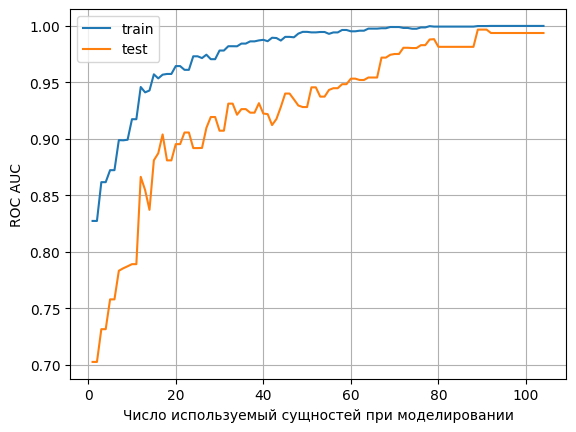

In [49]:
plt.plot(result_info['Число сущностей'], result_info['ROC AUC на трейне'], label='train')
plt.plot(result_info['Число сущностей'], result_info['ROC AUC на тесте'], label='test')
plt.xlabel('Число используемый сущностей при моделировании')
plt.ylabel('ROC AUC')
plt.grid()
plt.legend()
plt.show()

In [50]:
result_info[(result_info['Число сущностей']<=20) & (result_info['Число сущностей']>=15)]

,Число сущностей,ROC AUC на трейне,ROC AUC на тесте
84,20,0.964460,0.895363
85,19,0.957482,0.880989
86,18,0.957482,0.880989
87,17,0.956841,0.903939
88,16,0.953562,0.887259
89,15,0.957149,0.881048


Сильный рост метрики ROC AUC идет примерно до количества использумых сущностей равного 17. Далее будем использовать именно это количество сущностей для построения разных моделей.

In [51]:
drop_ess_flags = [f'_{i}' for i in range(17, len(order_dict))]
use_cols = [col for col in X_train.columns if all(map(lambda dc: dc not in col, drop_ess_flags))]
X_train = X_train[use_cols]
X_test = X_test[use_cols]

In [52]:
results = []
my_cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

## KNN

In [53]:
knn = KNeighborsClassifier()
knn_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('estimator', knn)
])

params = {
    'estimator__n_neighbors': np.arange(10, 31),
    'estimator__weights': ['uniform', 'distance']
}

knn_grid = GridSearchCV(
    estimator=knn_pipe,
    param_grid=params,
    scoring='roc_auc',
    cv=my_cv,
)

knn_grid.fit(X_train, y_train)
best_knn_pipe = knn_grid.best_estimator_
print(f'Лучашя модель: {best_knn_pipe.named_steps["estimator"]}')

best_knn_pipe.fit(X_train, y_train)

y_train_pred = best_knn_pipe.predict_proba(X_train)[:, 1]
y_test_pred = best_knn_pipe.predict_proba(X_test)[:, 1]

train_roc_auc = roc_auc_score(y_train, y_train_pred)
test_roc_auc = roc_auc_score(y_test, y_test_pred)
print(f'ROC AUC на тесте для модели ближайших соседей: {test_roc_auc}')

results.append(['KNN', train_roc_auc, test_roc_auc])

Лучашя модель: KNeighborsClassifier(n_neighbors=20)
ROC AUC на тесте для модели ближайших соседей: 0.8506447415118893


## Logistic Regression

In [54]:
logreg = LogisticRegression(class_weight='balanced', random_state=42)
logreg_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('estimator', logreg)
])

params = {
    'estimator__penalty': ['l1', 'l2'],
    'estimator__C': [0.01, 0.1, 1, 2],
    'estimator__solver': ['lbfgs', 'liblinear', 'newton-cg'],
    'estimator__max_iter': [100, 200, 300]
}

logreg_grid = GridSearchCV(
    estimator=logreg_pipe,
    param_grid=params,
    scoring='roc_auc',
    cv=my_cv,
)

logreg_grid.fit(X_train, y_train)
best_logreg_pipe = logreg_grid.best_estimator_
print(f'Лучашя модель: {best_logreg_pipe.named_steps["estimator"]}')

best_logreg_pipe.fit(X_train, y_train)

y_train_pred = best_logreg_pipe.predict_proba(X_train)[:, 1]
y_test_pred = best_logreg_pipe.predict_proba(X_test)[:, 1]

train_roc_auc = roc_auc_score(y_train, y_train_pred)
test_roc_auc = roc_auc_score(y_test, y_test_pred)
print(f'ROC AUC на тесте для модели логистической регрессии: {test_roc_auc}')

results.append(['LogisticRegression', train_roc_auc, test_roc_auc])

Лучашя модель: LogisticRegression(C=0.1, class_weight='balanced', penalty='l1',
                   random_state=42, solver='liblinear')
ROC AUC на тесте для модели логистической регрессии: 0.8678575653614101


## Random Forest

In [55]:
rfc = RandomForestClassifier(class_weight='balanced', random_state=42)
rfc_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('estimator', rfc)
])

params = {
    'estimator__n_estimators': np.arange(50, 301, 50),
    'estimator__max_depth': np.arange(3, 11),
    'estimator__max_features': ['sqrt', 'log2']
}

rfc_grid = GridSearchCV(
    estimator=rfc_pipe,
    param_grid=params,
    scoring='roc_auc',
    cv=my_cv,
)

rfc_grid.fit(X_train, y_train)
best_rfc_pipe = rfc_grid.best_estimator_
print(f'Лучашя модель: {best_rfc_pipe.named_steps["estimator"]}')

best_rfc_pipe.fit(X_train, y_train)

y_train_pred = best_rfc_pipe.predict_proba(X_train)[:, 1]
y_test_pred = best_rfc_pipe.predict_proba(X_test)[:, 1]

train_roc_auc = roc_auc_score(y_train, y_train_pred)
test_roc_auc = roc_auc_score(y_test, y_test_pred)
print(f'ROC AUC на тесте для модели случайного леса: {test_roc_auc}')

results.append(['RandomForestClassifier', train_roc_auc, test_roc_auc])

Лучашя модель: RandomForestClassifier(class_weight='balanced', max_depth=10,
                       max_features='log2', n_estimators=50, random_state=42)
ROC AUC на тесте для модели случайного леса: 0.8798059860404591


## XGBOOST

In [56]:
xgb = XGBClassifier(scale_pos_weight=pos_weight, random_state=42)
xgb_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('estimator', xgb)
])

params = {
    'estimator__n_estimators': np.arange(5, 30, 2),
    'estimator__max_depth': np.arange(2, 7),
    'estimator__alpha': [0.1, 1, 10]
}

xgb_grid = GridSearchCV(
    estimator=xgb_pipe,
    param_grid=params,
    scoring='roc_auc',
    cv=my_cv,
)

xgb_grid.fit(X_train, y_train)
best_xgb_pipe = xgb_grid.best_estimator_
print(f'Лучашя модель: {best_xgb_pipe.named_steps["estimator"]}')

best_xgb_pipe.fit(X_train, y_train)

y_train_pred = best_xgb_pipe.predict_proba(X_train)[:, 1]
y_test_pred = best_xgb_pipe.predict_proba(X_test)[:, 1]

train_roc_auc = roc_auc_score(y_train, y_train_pred)
test_roc_auc = roc_auc_score(y_test, y_test_pred)
print(f'ROC AUC на тесте для модели экстримального градиентного бустинга: {test_roc_auc}')

results.append(['XGBClassifier', train_roc_auc, test_roc_auc])

Лучашя модель: XGBClassifier(alpha=1, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=5, n_jobs=None,
              num_parallel_tree=None, ...)
ROC AUC на тесте для модели экстримального градиентного бустинга: 0.8737726251035135


## Выбор итоговой модели

In [57]:
pd.DataFrame(results, columns=['Модель', 'ROC AUC train', 'ROC AUC test'])

,Модель,ROC AUC train,ROC AUC test
0,KNN,0.902125,0.850645
1,LogisticRegression,0.896770,0.867858
2,RandomForestClassifier,0.998388,0.879806
3,XGBClassifier,0.904248,0.873773


Лучшими метриками roc auc на тесте обладают модели случайного леса и экстримального градиентного бустинга, при этом модель экстримального градиентного бустинга менее перееобучена чем модель случайного леса. Для финального пайплайна будет использоваться модель XGBoostClassifier

In [58]:
final_estimator = best_xgb_pipe.named_steps["estimator"]

# Пайплайн

## Создание пайплайна

Создадим пайплайн обработки данных, который будет оканчиваться лучшим классификатором

In [59]:
def feature_selection(data_in):
    feats = [
        'ID обучающегося в курсе',
        'Идентификатор по сущности',
        'ID родительской сущности',
        'Идентификатор по родительской сущности',
        'Количество перепрохождений сущности на 100%',
        'Прогресс по сущности',
        'Отказы по сущности',
        'Результат по сущности',
        'Статус по сущности',
        'Время в сущности до прохождения сущности',
        'Время в сущности до прохождения курса',
        'Время в сущности после прохождения сущности',
        'Общее время нахождения в сущности',
        'Попытки повторения по сущности',
        'Попытки изучения по сущности',
        'Все попытки по сущности'
    ]
    return data_in[feats]

In [60]:
def transform_feats(data_in):
    data_out = data_in.copy()

    def percent_to_number(percent):
        if type(percent) == float:
            return percent
        else:
            return float(percent.strip('%').replace(',', '.'))

    def to_hours(string_value):
        if type(string_value) == float:
            return string_value
        else:
            h, m, s = (int(s) for s in string_value.split(':'))
            return h+m/60+s/3600

    percent_cols = ['Результат по сущности', 'Прогресс по сущности']
    for col in percent_cols:
        data_out[col] = data_out[col].apply(percent_to_number)

    time_cols = [
        'Время в сущности до прохождения сущности',
        'Время в сущности до прохождения курса',
        'Время в сущности после прохождения сущности',
        'Общее время нахождения в сущности'
    ]
    for col in time_cols:
        data_out[col] = data_out[col].apply(to_hours)

    return data_out

In [61]:
def dtype_change(data_in):
    data_out = data_in.copy()

    cat_cols = [
        'ID обучающегося в курсе',
        'Идентификатор по сущности',
        'ID родительской сущности',
        'Идентификатор по родительской сущности',
        'Статус по сущности'
    ]

    data_out[cat_cols] = data_out[cat_cols].astype('object')
    return data_out

In [67]:
def nan_process(data_in):
    data_out = data_in.copy()
    data_out.dropna(subset='Идентификатор по сущности', inplace=True)
    data_out.loc[data_out['ID родительской сущности'].isna(), ['ID родительской сущности', 'Идентификатор по родительской сущности']] = -1

    return data_out

In [68]:
def data_aggregation(data_in):
    data_out = data_in.copy()
    boundary_ess_num = 16

    with open(f'data/relation_dict.pkl', 'rb') as file:
        relation_dict = dill.load(file)
    with open(f'data/order_dict.pkl', 'rb') as file:
        order_dict = dill.load(file)

    data_out['Идентификатор по сущности'].replace(relation_dict, inplace=True)
    ess_cols = data_out.drop(columns=['ID обучающегося в курсе']).columns.tolist()
    base_cols = ess_cols[1:]
    base_obj_cols = data_out[base_cols].select_dtypes('object').columns
    base_num_cols = data_out[base_cols].select_dtypes([int, float]).columns

    extend_cols = []
    for i in order_dict.values():
        extend_cols.extend([col+f'_{i}' for col in base_cols])
        if i == boundary_ess_num:
            break

    data_out_agg = pd.DataFrame([], columns=extend_cols, index=data_out['ID обучающегося в курсе'].unique())

    for user_id in data_out['ID обучающегося в курсе'].unique():
        sup_data = data_out[ess_cols][data_out['ID обучающегося в курсе']==user_id]
        for val in sup_data.values:
            ess_ident, *values = val
            i = order_dict[ess_ident]
            if i <= boundary_ess_num:
                fill_cols = [col+f'_{i}' for col in base_cols]
                data_out_agg.loc[user_id, fill_cols] = values

    for col in data_out_agg.columns:
        if any(map(lambda obj_col: obj_col in col, base_obj_cols)):
            data_out_agg[col] = data_out_agg[col].astype('object')
        else:
            data_out_agg[col] = data_out_agg[col].astype('float')

    return data_out_agg

In [69]:
final_pipe = Pipeline([
    ('feature_selection', FunctionTransformer(feature_selection)),
    ('transform_feats', FunctionTransformer(transform_feats)),
    ('dtype_change', FunctionTransformer(dtype_change)),
    ('nan_process', FunctionTransformer(nan_process)),
    ('data_aggregation', FunctionTransformer(data_aggregation)),
    ('preprocessor', preprocessor),
    ('estimator', best_xgb_pipe.named_steps["estimator"]),
])
final_pipe

Pipeline(steps=[('feature_selection',
                 FunctionTransformer(func=<function feature_selection at 0x00000239E25120D0>)),
                ('transform_feats',
                 FunctionTransformer(func=<function transform_feats at 0x00000239E265CF70>)),
                ('dtype_change',
                 FunctionTransformer(func=<function dtype_change at 0x00000239DD2434C0>)),
                ('nan_process',
                 FunctionTransformer(func=<function nan_process...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=2, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=5, n_jobs=None,
                               num_parallel_tree=None, ...))])

## Использование пайплайна

In [71]:
# Загрузим исходный датасет
my_data = pd.read_csv(f'data/main_data.csv', sep=';')
my_data = my_data[my_data['Название курса'].isin(['id 241 На пике: как работать в напряженных условиях', 'id 242 На пике: как работать в напряженных условиях'])]

# Определим таргет
my_data['Прошел курс'] = my_data['Прогресс по курсу'].apply(lambda d: int(d=='100,00%'))

# Разделим на тренировочную и тестовую выборку
students_id = my_data['ID обучающегося в курсе'].unique()
train_id, test_id = train_test_split(students_id, test_size=0.2)
train_data = my_data[my_data['ID обучающегося в курсе'].isin(train_id)]
test_data = my_data[my_data['ID обучающегося в курсе'].isin(test_id)]

In [72]:
train_target = train_data.groupby('ID обучающегося в курсе')[['Прошел курс']].first()
test_target = test_data.groupby('ID обучающегося в курсе')[['Прошел курс']].first()

In [73]:
final_pipe.fit(train_data, train_target)

Pipeline(steps=[('feature_selection',
                 FunctionTransformer(func=<function feature_selection at 0x00000239E25120D0>)),
                ('transform_feats',
                 FunctionTransformer(func=<function transform_feats at 0x00000239E265CF70>)),
                ('dtype_change',
                 FunctionTransformer(func=<function dtype_change at 0x00000239DD2434C0>)),
                ('nan_process',
                 FunctionTransformer(func=<function nan_process...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=2, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=5, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [74]:
train_pred = final_pipe.predict_proba(train_data)[:, 1]
test_pred = final_pipe.predict_proba(test_data)[:, 1]

In [75]:
print(f'roc auc на тренировочной выборке: {roc_auc_score(train_target, train_pred)}')
print(f'roc auc на тестовой выборке: {roc_auc_score(test_target, test_pred)}')

roc auc на тренировочной выборке: 0.8224521584334669
roc auc на тестовой выборке: 0.8399174528301887


Сохраним итоговую модель

In [76]:
with open(f'final_pipe.pkl', 'wb') as file:
    dill.dump(final_pipe, file)